<a href="https://colab.research.google.com/github/Balkrishnavajire/Balkrishnavajire/blob/main/How%20many%20people%20leave%20bank%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### #Importing the required libraries

In [2]:
import keras 
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1]:
pip install -U scikit-learn==0.20

     |████████████████████████████████| 5.3 MB 11.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


### #Importing the dataset

In [3]:
dataset=pd.read_csv("Churn_Modelling.csv")
X=dataset.iloc[:,3:13].values
y=dataset.iloc[:,13].values

In [4]:
labelencoder_X_1=LabelEncoder()
labelencoder=LabelEncoder()
X[:,2]=labelencoder.fit_transform(X[:,2])
X[:,1]=labelencoder_X_1.fit_transform(X[:,1])
onehotencoder=OneHotEncoder(categorical_features=[1])
X=onehotencoder.fit_transform(X).toarray()
X=X[:,1:] 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### #Splitting the dataset into the training set and test set

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### #Feature Scaling the variables

In [6]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### #Initialising the ANN

In [7]:
classifier=Sequential()

### #Adding input and first hidden layer

In [8]:
classifier.add(Dense(6, kernel_initializer='he_uniform', activation='relu', input_shape=(11,)))

### #Adding the second hidden layer 

In [9]:

classifier.add(Dense(11,kernel_initializer = 'uniform', activation = 'relu'))

### #Adding the output_layer

In [10]:
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

### #compiling the ANN

In [11]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### #Fitting the ANN to the training set

In [12]:
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
800/800 [==============================] - 5s 2ms/step - loss: 0.4873 - accuracy: 0.7929
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4383 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4327 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4297 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4267 - accuracy: 0.8065
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4235 - accuracy: 0.8175
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4212 - accuracy: 0.8207
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4189 - accuracy: 0.8254
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4173 - accuracy: 0.8256
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4157 - accura

### #Predicting the test set result

In [16]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred > 0.5)
y_pred=np.argmax(y_pred, axis=1)

### #Confusing matrix

In [18]:
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)


In [19]:
cm

array([[1595,    0],
       [ 405,    0]])

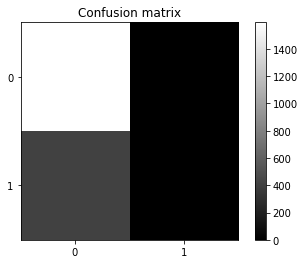

In [22]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.gray);
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)

plt.show()